In [3]:
import matplotlib.pyplot as plt
import numpy as np

from tools import prepare

ufs_classes_list = [
    #"Rhinolophus capensis",
    #"Rhinolophus smithersi",
    "Rhinolophus clivosus",
    "Rhinolophus simulator",
    #"Myotis tricolor",
    #"Myotis welwitschii",
    "Pipistrellus hesperidus",
    #"Eptesicus hottentotus",
    "Minopterus natalensis",
    "Taphozous mauritianus",
    #"Scotophilus dinganii",
    "Cistugo lesueuri",
    "Laephotis capensis",
    #"Rousettus aegyptiacus",
    "Chaerephon pumilus",
    "Tadarida aegyptiaca",
    #"Vespertilionidae",
    #"Kerivoula",
    "Pesticide Spray",
    #"Unlabeled",
]
ufs_classes = { ufs_classes_list[i]: i for i in range(0, len(ufs_classes_list)) }

ufs_classes_list2 = [
    "Rhinolophus capensis",
    "Rhinolophus smithersi",
    "Rhinolophus clivosus",
    "Rhinolophus simulator",
    "Myotis tricolor",
    "Myotis welwitschii",
    "Pipistrellus hesperidus",
    "Eptesicus hottentotus",
    "Minopterus natalensis",
    "Taphozous mauritianus",
    "Scotophilus dinganii",
    "Cistugo lesueuri",
    "Laephotis capensis",
    "Rousettus aegyptiacus",
    "Chaerephon pumilus",
    "Tadarida aegyptiaca",
    "Vespertilionidae",
    "Kerivoula",
    "Pesticide Spray",
    "Unlabeled",
]
ufs_classes2 = { ufs_classes_list2[i]: i for i in range(0, len(ufs_classes_list2)) }

In [2]:
num_bands = 257
max_len = 60
seq_len = (max_len + 1) * 2816      # = 250ms ~ 25ms (0.5 * 44 * (512 // 4))
seq_skip = int(max_len / 4) * 2816     # 15 patches = 15 * 0.25 * 22050 * 0.5
patch_len = 44
patch_skip = 22

max_seqs = 1000
min_seqs = 100

data_path = "../UFS/prepared_signal.h5"
X_train, Y_train, X_test, Y_test, X_val, Y_val = prepare(data_path, ufs_classes, seq_len, seq_skip, max_seqs, min_seqs)

100%|██████████| 47/47 [00:00<00:00, 48.97it/s] 


In [3]:
print("Total sequences:", len(X_train) + len(X_test) + len(X_val))
print("Train sequences:", X_train.shape, Y_train.shape)
print("Test sequences:", X_test.shape, Y_test.shape)
print("Validation sequences:", X_val.shape, Y_val.shape)

Total sequences: 15911
Train sequences: torch.Size([6758, 171776]) torch.Size([6758, 10])
Test sequences: torch.Size([5274, 171776]) torch.Size([5274, 10])
Validation sequences: torch.Size([3879, 171776]) torch.Size([3879, 10])


Rhinolophus clivosus 729.0
Rhinolophus simulator 75.0
Pipistrellus hesperidus 1764.0
Minopterus natalensis 198.0
Taphozous mauritianus 66.0
Cistugo lesueuri 1500.0
Laephotis capensis 2028.0
Chaerephon pumilus 1631.0
Tadarida aegyptiaca 1280.0
Pesticide Spray 1146.0


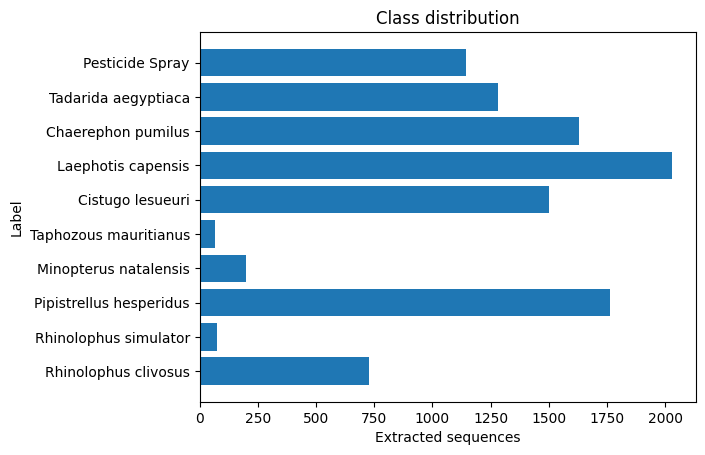

In [4]:
spec_count = np.zeros(len(list(ufs_classes)))
for label in Y_train: #np.concatenate([Y_train, Y_test, Y_val]):
    spec_count[np.nonzero(label)] += 1

for i, c in enumerate(list(ufs_classes)):
    print(c, spec_count[i])

plt.barh(list(ufs_classes), spec_count)
plt.ylabel("Label")
plt.xlabel("Extracted sequences")
plt.title("Class distribution")
plt.show()

In [5]:
print(spec_count)

[ 729.   75. 1764.  198.   66. 1500. 2028. 1631. 1280. 1146.]


In [8]:
import csv

time_data = [[] for _ in ufs_classes2]
date_data = [[] for _ in ufs_classes2]
temp_data = [[] for _ in ufs_classes2]
loc_data = [[] for _ in ufs_classes2]

spec_count2 = np.zeros(len(list(ufs_classes2)))

with open('../UFS/meta_n.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    next(reader)
    for row in reader:
        species = row[25]
        time = int(row[5].split(':')[0]) # hh:mm:ss to h
        date = int(row[4].split('-')[1]) # yyyy-mm-dd to m
        temp = float(row[12])
        loc = [float(row[10]), float(row[11])]
        
        for s in species.split(','):
            if s in ufs_classes2:
                i = ufs_classes2[s]
                spec_count2[i] += 1
                time_data[i].append(time)
                date_data[i].append(date)
                temp_data[i].append(temp)
                loc_data[i].append(loc)

Rhinolophus capensis 0
Rhinolophus smithersi 0
Rhinolophus clivosus 56
Rhinolophus simulator 3
Myotis tricolor 0
Myotis welwitschii 0
Pipistrellus hesperidus 507
Eptesicus hottentotus 1
Minopterus natalensis 10
Taphozous mauritianus 4
Scotophilus dinganii 0
Cistugo lesueuri 495
Laephotis capensis 21773
Rousettus aegyptiacus 0
Chaerephon pumilus 669
Tadarida aegyptiaca 4273
Vespertilionidae 0
Kerivoula 0
Pesticide Spray 1060
Unlabeled 14436


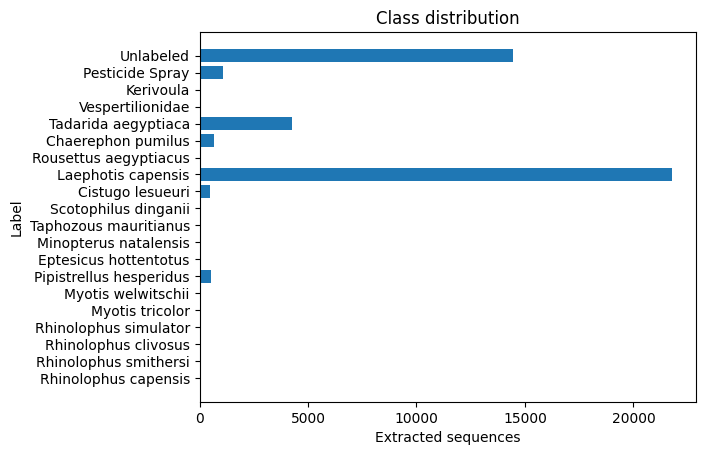

In [10]:
for i, c in enumerate(list(ufs_classes2)):
    print(c, int(spec_count2[i]))

plt.barh(list(ufs_classes2), spec_count2)
plt.ylabel("Label")
plt.xlabel("Extracted sequences")
plt.title("Class distribution")
plt.show()

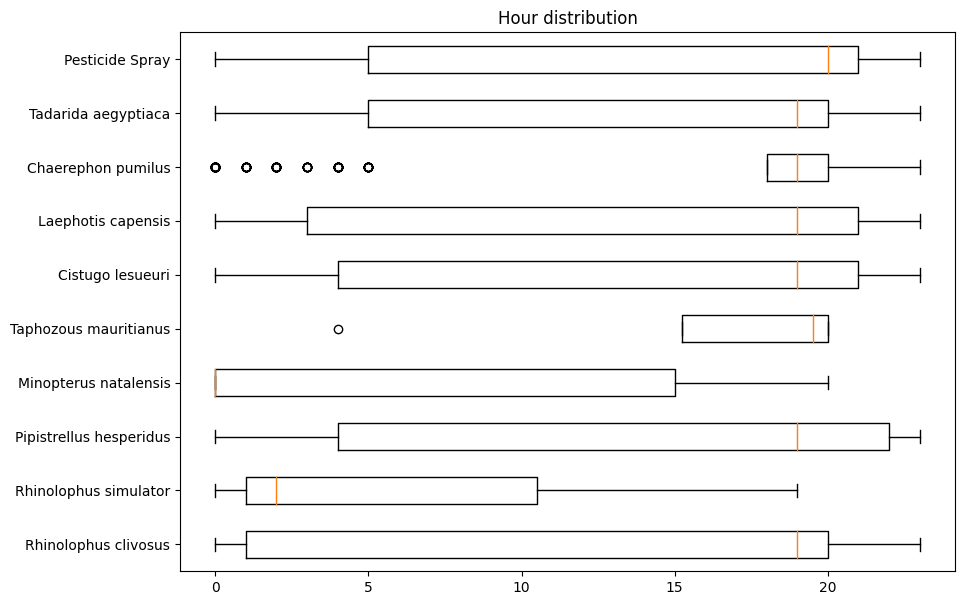

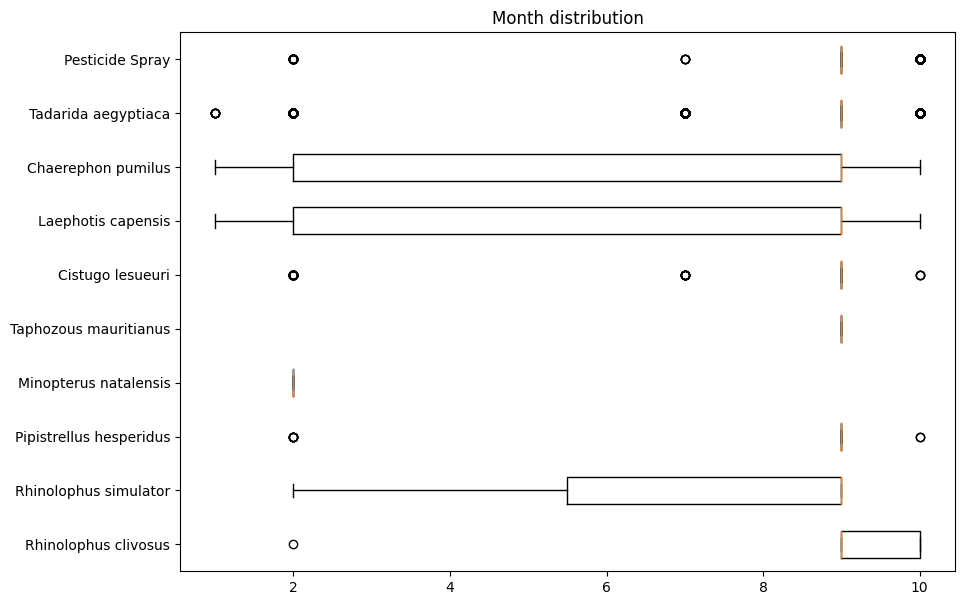

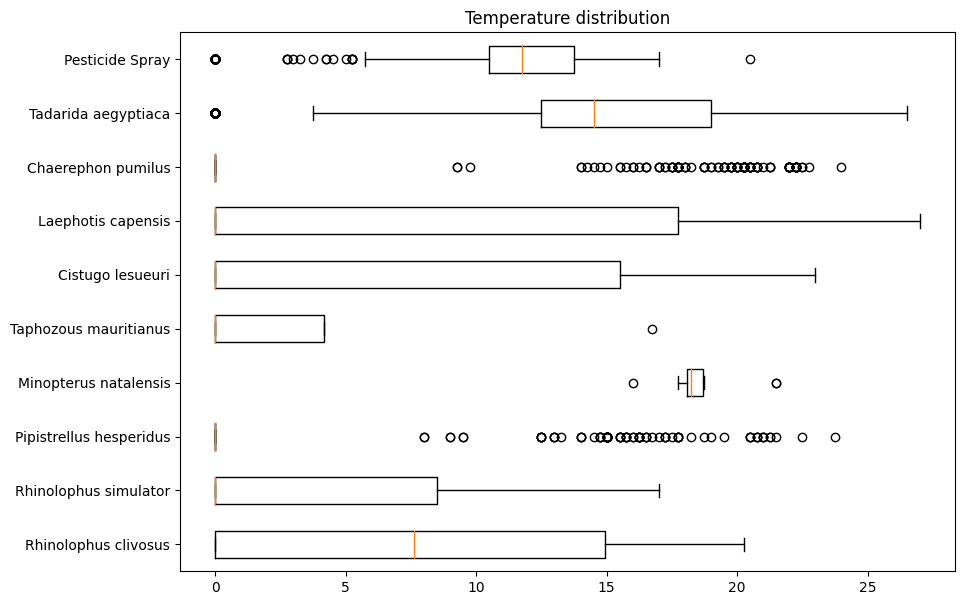

In [8]:
# For each class: avg time boxplot, avg temperatur boxplot
# weather matrix, geo matrix
# location on map

fig = plt.figure(figsize =(10, 7))
plt.boxplot(time_data, labels=list(ufs_classes), vert=False)
plt.title("Hour distribution")
plt.show()

fig = plt.figure(figsize =(10, 7))
plt.boxplot(date_data, labels=list(ufs_classes), vert=False)
plt.title("Month distribution")
plt.show()

fig = plt.figure(figsize =(10, 7))
plt.boxplot(temp_data, labels=list(ufs_classes), vert=False)
plt.title("Temperature distribution")
plt.show()